In [5]:
import pandas as pd
pd.options.display.max_columns = 60

df = pd.read_csv('/content/Superstore.csv', encoding='latin1')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
# Step A: show current columns so we know what's actually present
print("Current columns (raw):")
print(list(df.columns))
print("\n---\n")

# Step B: normalize column names to a safe format and show them
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_').str.replace('.','')
print("Columns AFTER normalizing (lowercase, underscores):")
print(list(df.columns))
print("\n---\n")

# Step C: defensive cleaning that only runs if the expected column exists
# This avoids KeyError and tells you if a name mismatch remains.

# convert dates if present
if 'order_date' in df.columns:
    df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
    print("Converted order_date -> datetime")
else:
    print("NOTE: 'order_date' column not found after normalization.")
    # show best column name candidates to help you pick
    candidates = [c for c in df.columns if 'order' in c or 'date' in c]
    print("Columns that include 'order' or 'date':", candidates)

# convert ship_date if present
if 'ship_date' in df.columns:
    df['ship_date'] = pd.to_datetime(df['ship_date'], errors='coerce')
    print("Converted ship_date -> datetime")
else:
    print("NOTE: 'ship_date' not found (that's OK if your file uses another name)")

# Basic show so you know things are OK
print("\nData sample after attempted date conversion:")
display(df.head())
print("\nCurrent shape:", df.shape)


Current columns (raw):
['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']

---

Columns AFTER normalizing (lowercase, underscores):
['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'customer_name', 'segment', 'country', 'city', 'state', 'postal_code', 'region', 'product_id', 'category', 'sub_category', 'product_name', 'sales', 'quantity', 'discount', 'profit']

---

Converted order_date -> datetime
Converted ship_date -> datetime

Data sample after attempted date conversion:


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,NaT,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164



Current shape: (9994, 21)


In [9]:
# --- FINAL CLEANING STEP ---

# 1. Remove duplicates
df = df.drop_duplicates()
print("✓ Duplicates removed")

# 2. Strip text whitespace
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str).str.strip()
print("✓ Text cleaned")

# 3. Convert dates (already tested)
df["order_date"] = pd.to_datetime(df["order_date"], errors='coerce')
df["ship_date"] = pd.to_datetime(df["ship_date"], errors='coerce')
print("✓ Dates converted")

# 4. Convert numeric columns
num_cols = ["sales", "profit", "quantity", "discount"]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
print("✓ Numeric columns cleaned")

# 5. Remove missing required fields
df = df[df["order_id"].notna()]
df = df[df["order_date"].notna()]
print("✓ Missing values handled")

# 6. Create helper columns
df["order_year"] = df["order_date"].dt.year
df["order_month"] = df["order_date"].dt.to_period("M").astype(str)
df["order_day"] = df["order_date"].dt.date
print("✓ Helper columns created")

# 7. Save cleaned data
df.to_csv("/content/data_cleaned.csv", index=False)
print("✓ Cleaned file saved as data_cleaned.csv")

df.head(), df.shape


✓ Duplicates removed
✓ Text cleaned
✓ Dates converted
✓ Numeric columns cleaned
✓ Missing values handled
✓ Helper columns created
✓ Cleaned file saved as data_cleaned.csv


(   row_id        order_id order_date  ship_date       ship_mode customer_id  \
 0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
 1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
 2       3  CA-2016-138688 2016-06-12        NaT    Second Class    DV-13045   
 3       4  US-2015-108966 2015-10-11        NaT  Standard Class    SO-20335   
 4       5  US-2015-108966 2015-10-11        NaT  Standard Class    SO-20335   
 
      customer_name    segment        country             city       state  \
 0      Claire Gute   Consumer  United States        Henderson    Kentucky   
 1      Claire Gute   Consumer  United States        Henderson    Kentucky   
 2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
 3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
 4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
 
    postal_code region       product_id         

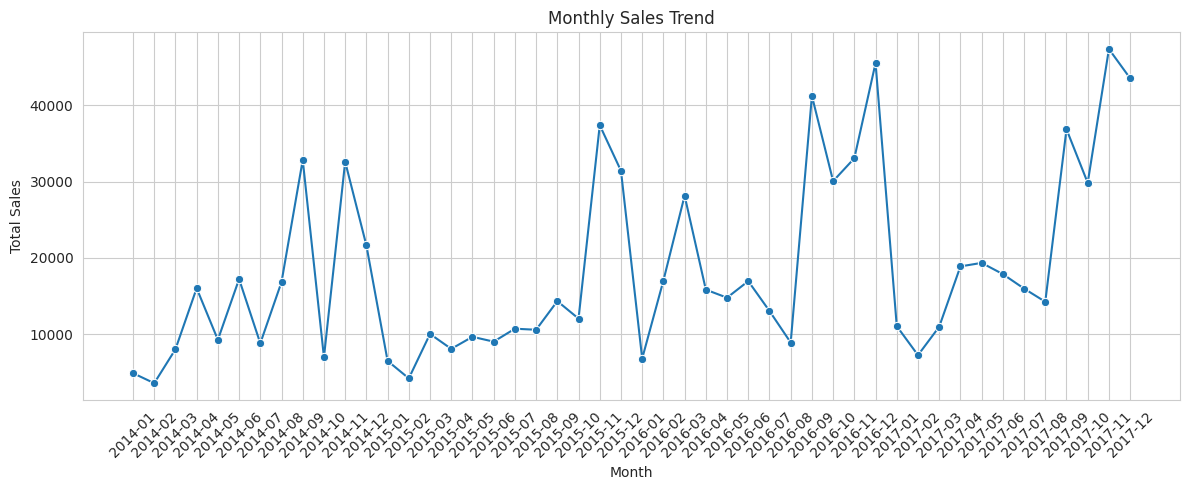

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make charts cleaner
sns.set_style("whitegrid")

# Monthly Sales
monthly_sales = df.groupby("order_month")["sales"].sum().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_sales, x="order_month", y="sales", marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


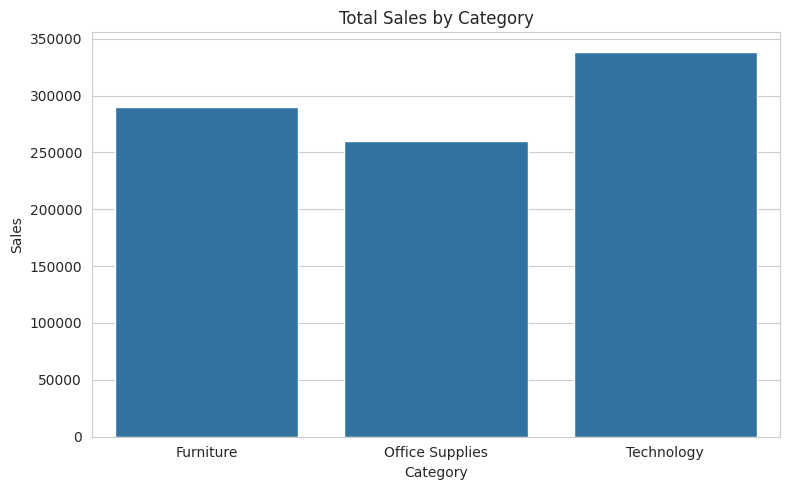

In [11]:
category_sales = df.groupby("category")["sales"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=category_sales, x="category", y="sales")
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


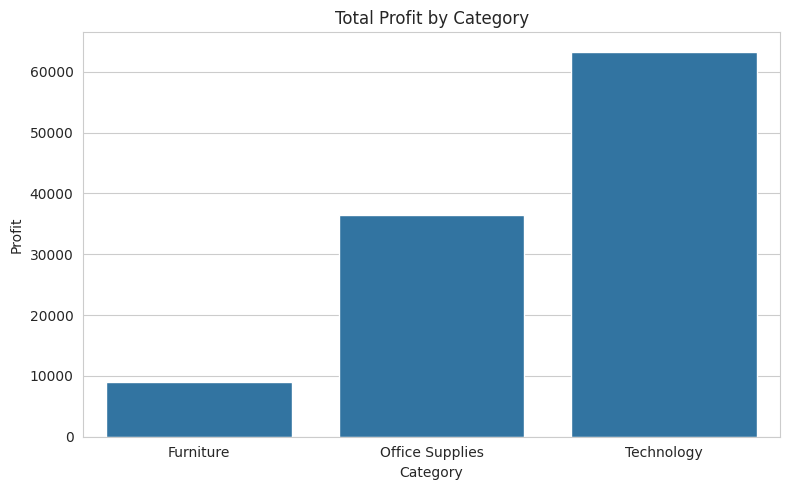

In [12]:
category_profit = df.groupby("category")["profit"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=category_profit, x="category", y="profit")
plt.title("Total Profit by Category")
plt.xlabel("Category")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()


In [13]:
import sqlite3, pandas as pd, os

# Make folder to save query results
os.makedirs('/content/query_results', exist_ok=True)

# Load your cleaned file
df_clean = pd.read_csv('/content/data_cleaned.csv')

# Create SQL database
conn = sqlite3.connect('/content/sales_analysis.db')

# Put data inside SQL table (named "sales")
df_clean.to_sql('sales', conn, if_exists='replace', index=False)

print("✓ Data loaded into SQL database")

# ----- SIMPLE SQL QUESTIONS -----

queries = {
    "total_sales_profit": "SELECT SUM(sales) AS total_sales, SUM(profit) AS total_profit FROM sales;",
    "sales_by_category": "SELECT category, SUM(sales) AS sales FROM sales GROUP BY category;",
    "profit_by_category": "SELECT category, SUM(profit) AS profit FROM sales GROUP BY category;",
    "top_customers": "SELECT customer_name, SUM(sales) AS revenue FROM sales GROUP BY customer_name ORDER BY revenue DESC LIMIT 10;",
    "top_products": "SELECT product_name, SUM(sales) AS revenue FROM sales GROUP BY product_name ORDER BY revenue DESC LIMIT 10;"
}

# Run each query and save result as CSV
for name, q in queries.items():
    result = pd.read_sql(q, conn)
    result.to_csv(f"/content/query_results/{name}.csv", index=False)
    print(f"✓ Saved: {name}")

# Show totals on screen
print("\nQuick Total:")
print(pd.read_sql(queries["total_sales_profit"], conn))

conn.close()


✓ Data loaded into SQL database
✓ Saved: total_sales_profit
✓ Saved: sales_by_category
✓ Saved: profit_by_category
✓ Saved: top_customers
✓ Saved: top_products

Quick Total:
   total_sales  total_profit
0  887917.3116   108803.3151


In [14]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('/content/sales_analysis.db')

# 1️⃣ Profit margin by category
q1 = """
SELECT category,
       ROUND(SUM(profit), 2) AS total_profit,
       ROUND(SUM(sales), 2) AS total_sales,
       ROUND((SUM(profit) / SUM(sales)) * 100, 2) AS profit_margin_pct
FROM sales
GROUP BY category
ORDER BY profit_margin_pct DESC;
"""

# 2️⃣ Discount analysis by category
q2 = """
SELECT category,
       ROUND(AVG(discount) * 100, 2) AS avg_discount_percentage,
       COUNT(*) AS total_orders
FROM sales
GROUP BY category
ORDER BY avg_discount_percentage DESC;
"""

# 3️⃣ Loss-making orders
q3 = """
SELECT order_id, product_name, sales, profit, category, sub_category
FROM sales
WHERE profit < 0
ORDER BY profit ASC
LIMIT 20;
"""

# 4️⃣ Top sub-category inside each category
q4 = """
SELECT category, sub_category, total_sales
FROM (
    SELECT category, sub_category, SUM(sales) AS total_sales,
           ROW_NUMBER() OVER (PARTITION BY category ORDER BY SUM(sales) DESC) AS rn
    FROM sales
    GROUP BY category, sub_category
)
WHERE rn = 1;
"""

# 5️⃣ Pareto (top 20% customers)
q5 = """
WITH customer_sales AS (
    SELECT customer_name, SUM(sales) AS revenue
    FROM sales
    GROUP BY customer_name
),
ordered AS (
    SELECT customer_name, revenue,
           SUM(revenue) OVER (ORDER BY revenue DESC) AS cumulative_revenue,
           SUM(revenue) OVER () AS total_revenue
    FROM customer_sales
)
SELECT customer_name, revenue,
       ROUND((cumulative_revenue/total_revenue)*100, 2) AS cumulative_percentage
FROM ordered
WHERE cumulative_percentage <= 80;
"""

queries = {
    "profit_margin_by_category": q1,
    "discount_analysis": q2,
    "loss_making_orders": q3,
    "top_subcategory_per_category": q4,
    "pareto_customers_top80": q5
}

# Execute and save
for name, query in queries.items():
    df_out = pd.read_sql(query, conn)
    df_out.to_csv(f"/content/query_results/{name}.csv", index=False)
    print(f"✓ Saved {name} ({len(df_out)} rows)")

conn.close()


✓ Saved profit_margin_by_category (3 rows)
✓ Saved discount_analysis (3 rows)
✓ Saved loss_making_orders (20 rows)
✓ Saved top_subcategory_per_category (3 rows)
✓ Saved pareto_customers_top80 (278 rows)


In [15]:
pd.read_csv("/content/query_results/profit_margin_by_category.csv").head()


,category,total_profit,total_sales,profit_margin_pct
0,Technology,63324.42,338607.46,18.70
1,Office Supplies,36533.96,259573.57,14.07
2,Furniture,8944.93,289736.28,3.09


In [16]:
pd.read_csv("/content/query_results/discount_analysis.csv").head()


,category,avg_discount_percentage,total_orders
0,Furniture,17.62,838
1,Office Supplies,15.63,2430
2,Technology,13.32,774


In [17]:
pd.read_csv("/content/query_results/top_subcategory_per_category.csv").head()


,category,sub_category,total_sales
0,Furniture,Chairs,124914.961
1,Office Supplies,Storage,85450.682
2,Technology,Phones,125326.604
